In [175]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from cartopy import crs
from cartopy import feature as cfeature
import matplotlib.colors as mcolors

import fiona
import shapely.geometry
from pyproj import Geod


In [176]:




results_agri = pd.read_csv(
    "Scenario_no_agri_3540.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)



results_CMIP = pd.read_csv(
    "Reference_CMIP_5570.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)

results_ERA5 = pd.read_csv(
    "Reference_ERA5_5961.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)

results_HBV = pd.read_csv(
    "HBV_Kerki_5961.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)

results_LB = pd.read_csv(
    "discharge_leakybucket.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible    
)


In [177]:
conversion_mmday2m3s = 1 / (1000 * 86400)
shape = fiona.open('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/AralSea_Basin/Kerki/Kerki.shp')
poly = [shapely.geometry.shape(p["geometry"]) for p in shape][0]
geod = Geod(ellps="WGS84")
poly_area, poly_perimeter = geod.geometry_area_perimeter(poly)
catchment_area_m2 = abs(poly_area)
print(f"{catchment_area_m2 = }")

results_HBV['Modelled_discharge'] = results_HBV['Modelled_discharge']* conversion_mmday2m3s * catchment_area_m2
results_LB['discharge'] = results_LB['discharge']* conversion_mmday2m3s * catchment_area_m2


catchment_area_m2 = 282058565728.36066


In [178]:
from ewatercycle.observation.grdc import get_grdc_data

grdc_chatly = get_grdc_data(2817100,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')

grdc_kerki = get_grdc_data(2617110,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')

grdc_varzob = get_grdc_data(2517550,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')



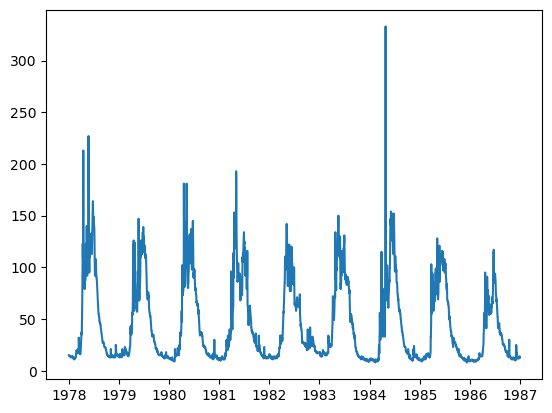

In [179]:
plt.plot(grdc_varzob['time'],grdc_varzob['streamflow'], label='GRDC Varzob near Dushanbe')

In [180]:
grdc_varzob

<xarray.Dataset> Size: 53kB
Dimensions:              (time: 3287)
Coordinates:
  * time                 (time) datetime64[ns] 26kB 1978-01-01 ... 1986-12-31
    id                   int64 8B 2517550
Data variables:
    streamflow           (time) float64 26kB 15.0 15.0 15.0 ... 14.0 14.0 13.0
    area                 float64 8B 1.27e+03
    country              <U2 8B 'TJ'
    geo_x                float64 8B 68.81
    geo_y                float64 8B 38.76
    geo_z                float64 8B 969.0
    owneroforiginaldata  <U85 340B 'Initial dataset collected in the framewor...
    river_name           <U6 24B 'VARZOB'
    station_name         <U10 40B 'DAGANA-ATA'
    timezone             float64 8B nan
Attributes:
    title:          NA
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Converted from 2517550_Q_Day.Cmd.txt of 2025-09-02 to net...
    missing_value:  -999.000

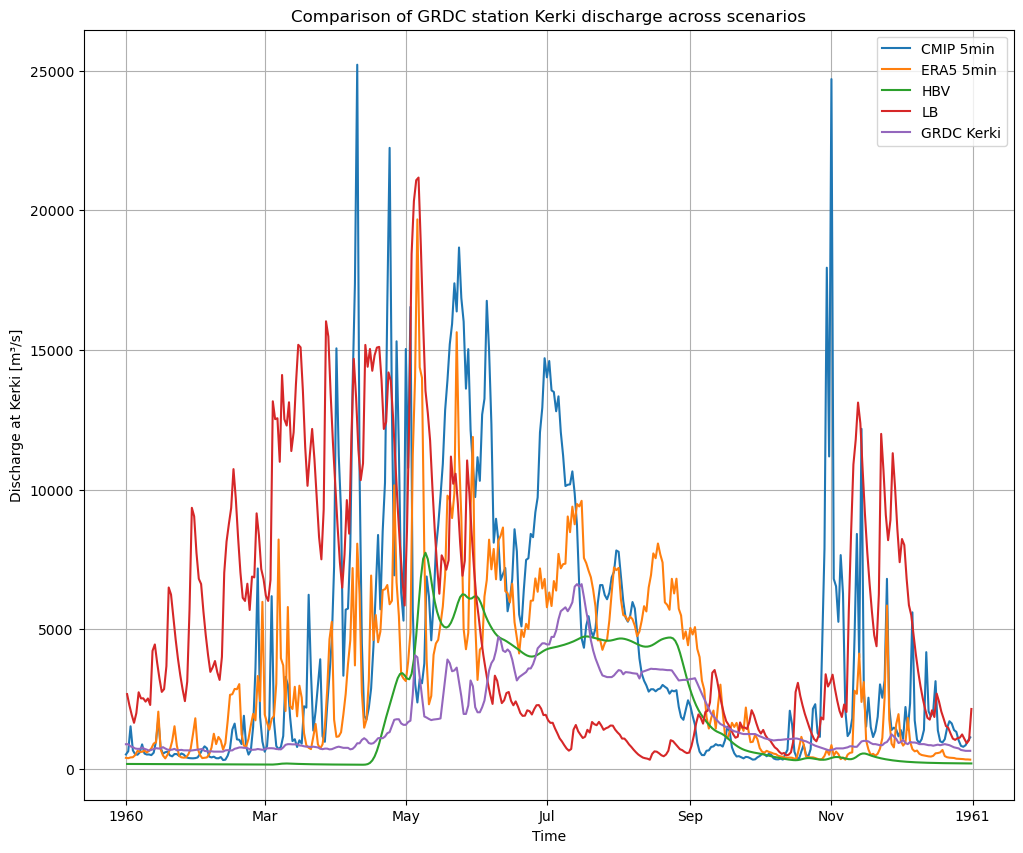

In [181]:
plt.figure(figsize=(12, 10))
plt.plot(results_CMIP.loc['1960']['Kerki'], label='CMIP 5min')
plt.plot(results_ERA5.loc['1960']['Kerki'], label='ERA5 5min')
plt.plot(results_HBV.loc['1960']['Modelled_discharge'],label='HBV')
plt.plot(results_LB.loc['1960']['discharge'],label='LB')
#plt.plot(results_agri.loc['1937']['Kerki'], label='CMIP - non human 5min')
# plt.plot(results_agri.loc['1971']['Kerki'], label='No Agriculture scenario')
# plt.plot(results_kwave.loc['1971']['Kerki'], label='Kinematic Wave')

grdc_kerki['streamflow'].sel(time=slice('1960', '1960')).plot(label='GRDC Kerki')


plt.xlabel('Time')
plt.ylabel('Discharge at Kerki [m³/s]')
plt.title('Comparison of GRDC station Kerki discharge across scenarios')
plt.legend()
#plt.xlim(0,365)
plt.grid(True)
plt.show()


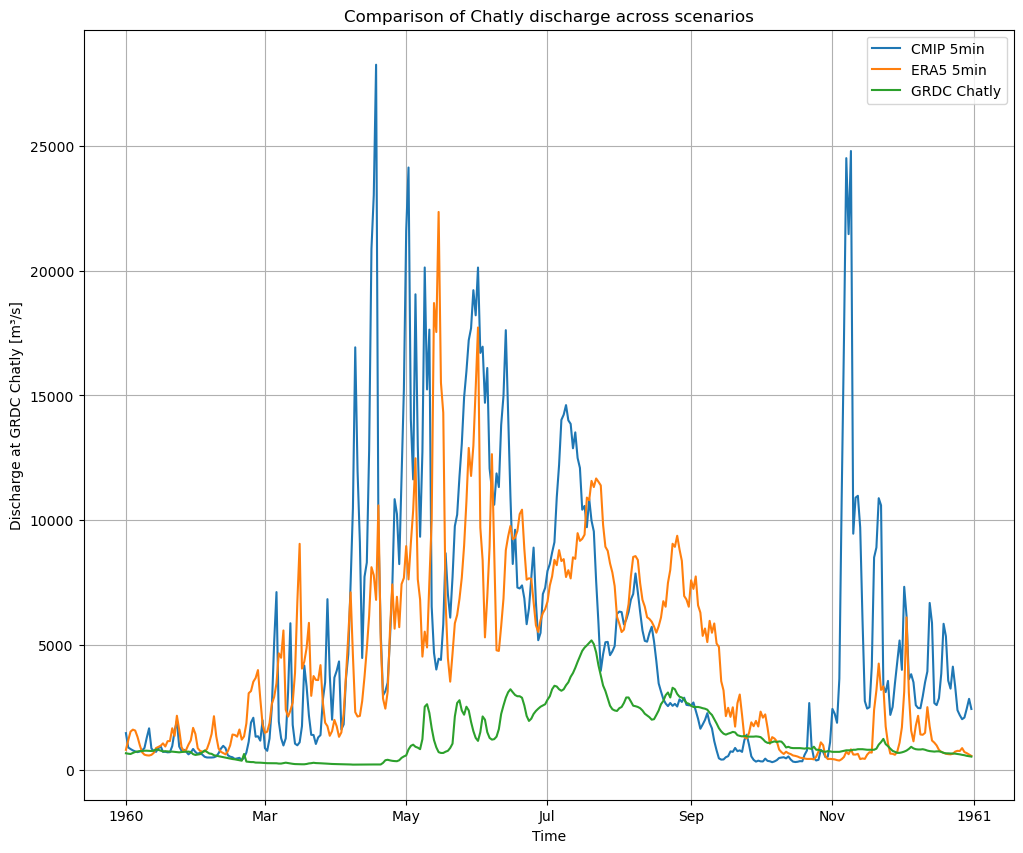

In [182]:
plt.figure(figsize=(12, 10))
plt.plot(results_CMIP.loc['1960']['Chatly'], label='CMIP 5min')
plt.plot(results_ERA5.loc['1960']['Chatly'], label='ERA5 5min')
#plt.plot(results_agri.loc['1937']['Chatly'], label='CMIP - non human 5min')

grdc_chatly['streamflow'].sel(time=slice('1960', '1960')).plot(label='GRDC Chatly')


plt.xlabel('Time')
plt.ylabel('Discharge at GRDC Chatly [m³/s]')
plt.title('Comparison of Chatly discharge across scenarios')
plt.legend()
#plt.xlim(0,365)
plt.grid(True)
plt.show()

In [183]:
file_name_1 = '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Comparison/pcrglobwb_20251107_181553/netcdf/discharge_dailyTot_output.nc'

In [184]:
import xarray as xr
ds_1 = xr.open_dataset(file_name_1)
print(ds_1)

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 5844, lat: 216, lon: 324)
Coordinates:
  * time       (time) datetime64[ns] 47kB 1955-01-01 1955-01-02 ... 1970-12-31
  * lat        (lat) float32 864B 51.96 51.88 51.79 51.71 ... 34.21 34.12 34.04
  * lon        (lon) float32 1kB 53.04 53.12 53.21 53.29 ... 79.79 79.88 79.96
Data variables:
    discharge  (time, lat, lon) float32 2GB ...
Attributes:
    description:  by Edwin H. Sutanudjaja (contact: e.h.sutanudjaja@uu.nl)
    institution:  Department of Physical Geography, Utrecht University
    title:        PCR-GLOBWB 2 output (not coupled to MODFLOW)


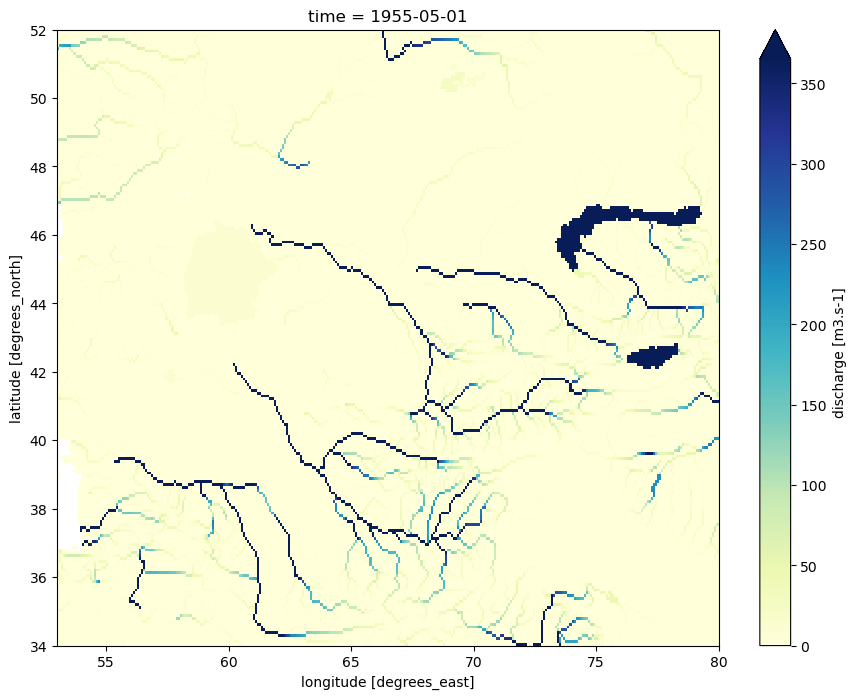

In [185]:
# get the first variable name
first_var = list(ds_1.data_vars)[0]

# select that variable and last timestep
da_1 = ds_1[first_var].isel(time=120)


#da_1 = ds_1[0].isel(time =-1)
#fig, ax = plt.subplots(figsize=(12, 8))

da_1.plot(cmap="YlGnBu", robust=True, size=8)

#plt.title(str(da["valid_time"].values))  # extract timestamp from coords
#plt.savefig('ERA5_pr_1988-12-22_21UTC.png')
plt.show()

In [186]:
da_1.time

<xarray.DataArray 'time' ()> Size: 8B
array('1955-05-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 1955-05-01
Attributes:
    standard_name:  time
    long_name:      Days since 1901-01-01

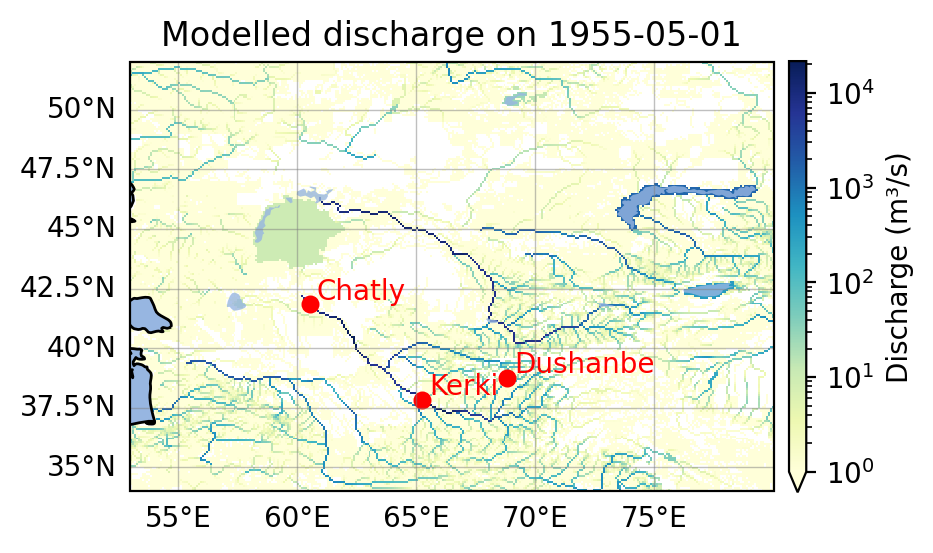

In [187]:
timestamp = da_1.time.values
date_str = np.datetime_as_string(timestamp, unit='D')

# Use matplotlib to make the figure slightly nicer
fig = plt.figure(figsize=(5, 4), dpi=200)

ax = fig.add_subplot(111, projection=crs.PlateCarree())

# Plotting the model field is a one-liner
#reference.get_value_as_xarray("discharge").plot(ax=ax, cmap="GnBu")
da_1.plot(
    ax=ax,
    cmap="YlGnBu",
    robust=True,
    norm=mcolors.LogNorm(vmin=1, vmax=da_1.max()),
    cbar_kwargs={
        "shrink": 0.7,           # make it 70% of the original height
        "aspect": 25,            # make it thinner
        "pad": 0.02,             # reduce distance between map and colorbar
        "label": "Discharge (m³/s)"
    }
)
# Also plot the station location
Dushanbe_station_latitude = 38.76042
Dushanbe_station_longitude = 68.81458

Kerki_station_latitude = 37.8396310038444
Kerki_station_longitude = 65.23703868931334

Chatly_station_latitude = 42.34332908492399 - 0.5  # adjusted
Chatly_station_longitude = 59.627516175820965 + 0.9  # adjusted

# Plot stations
ax.scatter(Dushanbe_station_longitude, Dushanbe_station_latitude, 
           s=30, color="red", marker="o", label="Dushanbe")
ax.scatter(Kerki_station_longitude, Kerki_station_latitude, 
           s=30, color="red", marker="o", label="Kerki")
ax.scatter(Chatly_station_longitude, Chatly_station_latitude, 
           s=30, color="red", marker="o", label="Chatly")

# Add labels next to markers
ax.text(Dushanbe_station_longitude + 0.3, Dushanbe_station_latitude + 0.2, "Dushanbe", color="red")
ax.text(Kerki_station_longitude + 0.3, Kerki_station_latitude + 0.2, "Kerki", color="red")
ax.text(Chatly_station_longitude + 0.3, Chatly_station_latitude + 0.2, "Chatly", color="red")

# Overlay ocean and coastines
ax.add_feature(cfeature.OCEAN, zorder=2)
#ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.8)
#ax.add_feature(cfeature.RIVERS)
#ax.add_feature(cfeature.RIVERS, zorder=2, color="k")
ax.coastlines(zorder=3)

#gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

#title and caption
ax.set_title(f"Modelled discharge on {date_str}")
#fig.text(0.5, 0.01, "Figure 1: Modeled discharge along Amu Darya on the given date.",
#         ha='center', fontsize=12)


#plt.savefig("Discharge_field.png")
plt.show()

Text(0.5, 0, 'Date')

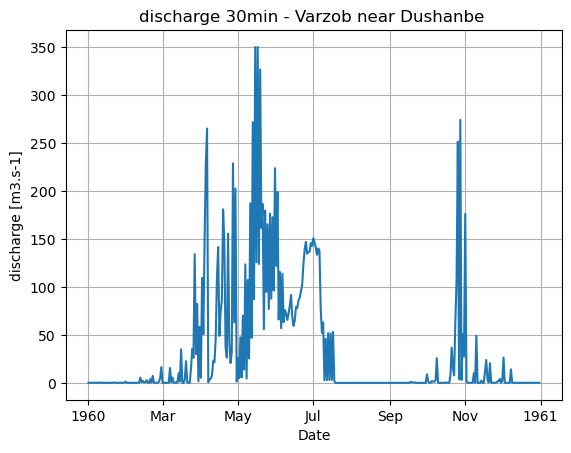

In [188]:
da_slice = ds_1[first_var].sel(lat=42.35144950637272,lon=59.6170672781565, method="nearest")
da_slice_kerki = ds_1[first_var].sel(lat=37.84142225056401,lon=65.23396486873717, method="nearest")
da_slice_dushanbe = ds_1[first_var].sel(
    lat=38.76042,
    lon=68.81458,
    method="nearest"
).sel(
    time=slice('1960-01-01', '1960-12-31')
)


#37.84142225056401, 65.23396486873717 Kerki
#da_slice.plot()
#da_slice_kerki.plot()
da_slice_dushanbe.plot()
plt.title('discharge 30min - Varzob near Dushanbe ')
plt.grid()
#plt.ylim(0,300)
plt.xlabel('Date')

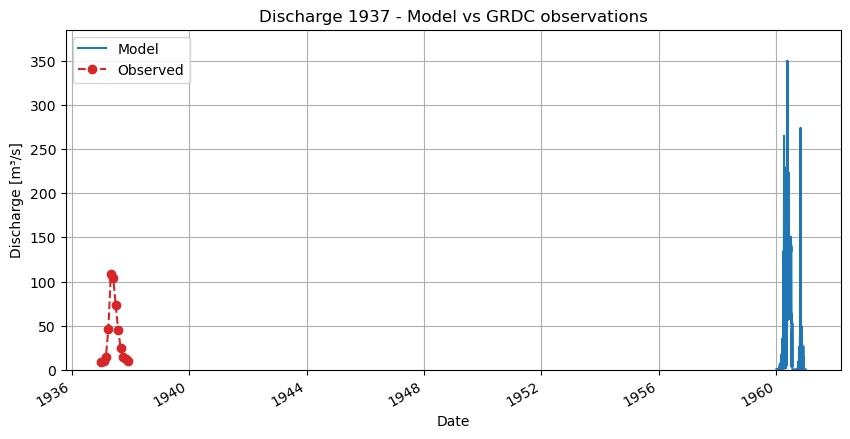

In [189]:
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Prepare observed discharge
obs_data = {
    "date": pd.date_range(start="1937-01-01", periods=12, freq="MS"),
    "discharge": [9, 10, 15, 46, 108, 104, 74, 45, 25, 14, 12, 10]
}
df_obs = pd.DataFrame(obs_data)
df_obs.set_index("date", inplace=True)

# 2️⃣ Plot model and observed together
plt.figure(figsize=(10, 5))

# Model data
da_slice_dushanbe.plot(label="Model", color="tab:blue")

# Observed data
df_obs["discharge"].plot(marker='o', linestyle='--', color="tab:red", label="Observed")

plt.title("Discharge 1937 - Model vs GRDC observations")
plt.xlabel("Date")
plt.ylabel("Discharge [m³/s]")
plt.legend()
plt.grid(True)
plt.ylim(0, max(df_obs["discharge"].max(), da_slice_dushanbe.max())*1.1)
plt.show()


In [190]:
observations = get_grdc_data(
                station_id=2617110,
                start_time= '1959-01-01T00:00Z',
                end_time = '1961-12-31T00:00Z',
                data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/',
                column='GRDC',
            )

observations.GRDC.to_dataframe().head()
combined_discharge = observations.copy()

# Make sure Series index is datetime
model_series_CMIP = results_CMIP["Kerki"]
model_series_ERA5 = results_ERA5["Kerki"]
model_series_HBV = results_HBV['Modelled_discharge']
model_series_LB = results_LB['discharge']

model_series_CMIP.index = model_series_CMIP.index.tz_convert(None) if model_series_CMIP.index.tz is not None else model_series_CMIP.index
model_series_ERA5.index = model_series_ERA5.index.tz_convert(None) if model_series_ERA5.index.tz is not None else model_series_ERA5.index
model_series_HBV.index = model_series_HBV.index.normalize()
model_series_LB.index = model_series_LB.index.normalize()

# Interpolate to match observation time
obs_times = combined_discharge["time"].to_index()
model_series_aligned_CMIP = model_series_CMIP.reindex(obs_times, method=None).interpolate(method='time')
model_series_aligned_ERA5 = model_series_ERA5.reindex(obs_times, method=None).interpolate(method='time')
model_series_aligned_HBV = model_series_HBV.reindex(obs_times, method=None).interpolate(method='time')
model_series_aligned_LB = model_series_LB.reindex(obs_times, method=None).interpolate(method='time')

df = combined_discharge.to_dataframe()  # now we have a DataFrame
df["CMIP"] = model_series_aligned_CMIP
df["ERA5"] = model_series_aligned_ERA5
df["HBV"] = model_series_aligned_HBV
df["LB"] = model_series_aligned_LB
df.head()

df2 = df[['GRDC', 'CMIP','ERA5',"HBV","LB"]].copy()
df2 = df2.astype(float)
df_1960 = df2[df2.index.year == 1960]





(<Figure size 2000x1600 with 2 Axes>,
 (<Axes: title={'center': 'Hydrograph at Kerki station - 1960'}, xlabel='time', ylabel='Discharge (m$^3$ s$^{-1}$)'>,
  <Axes: >))

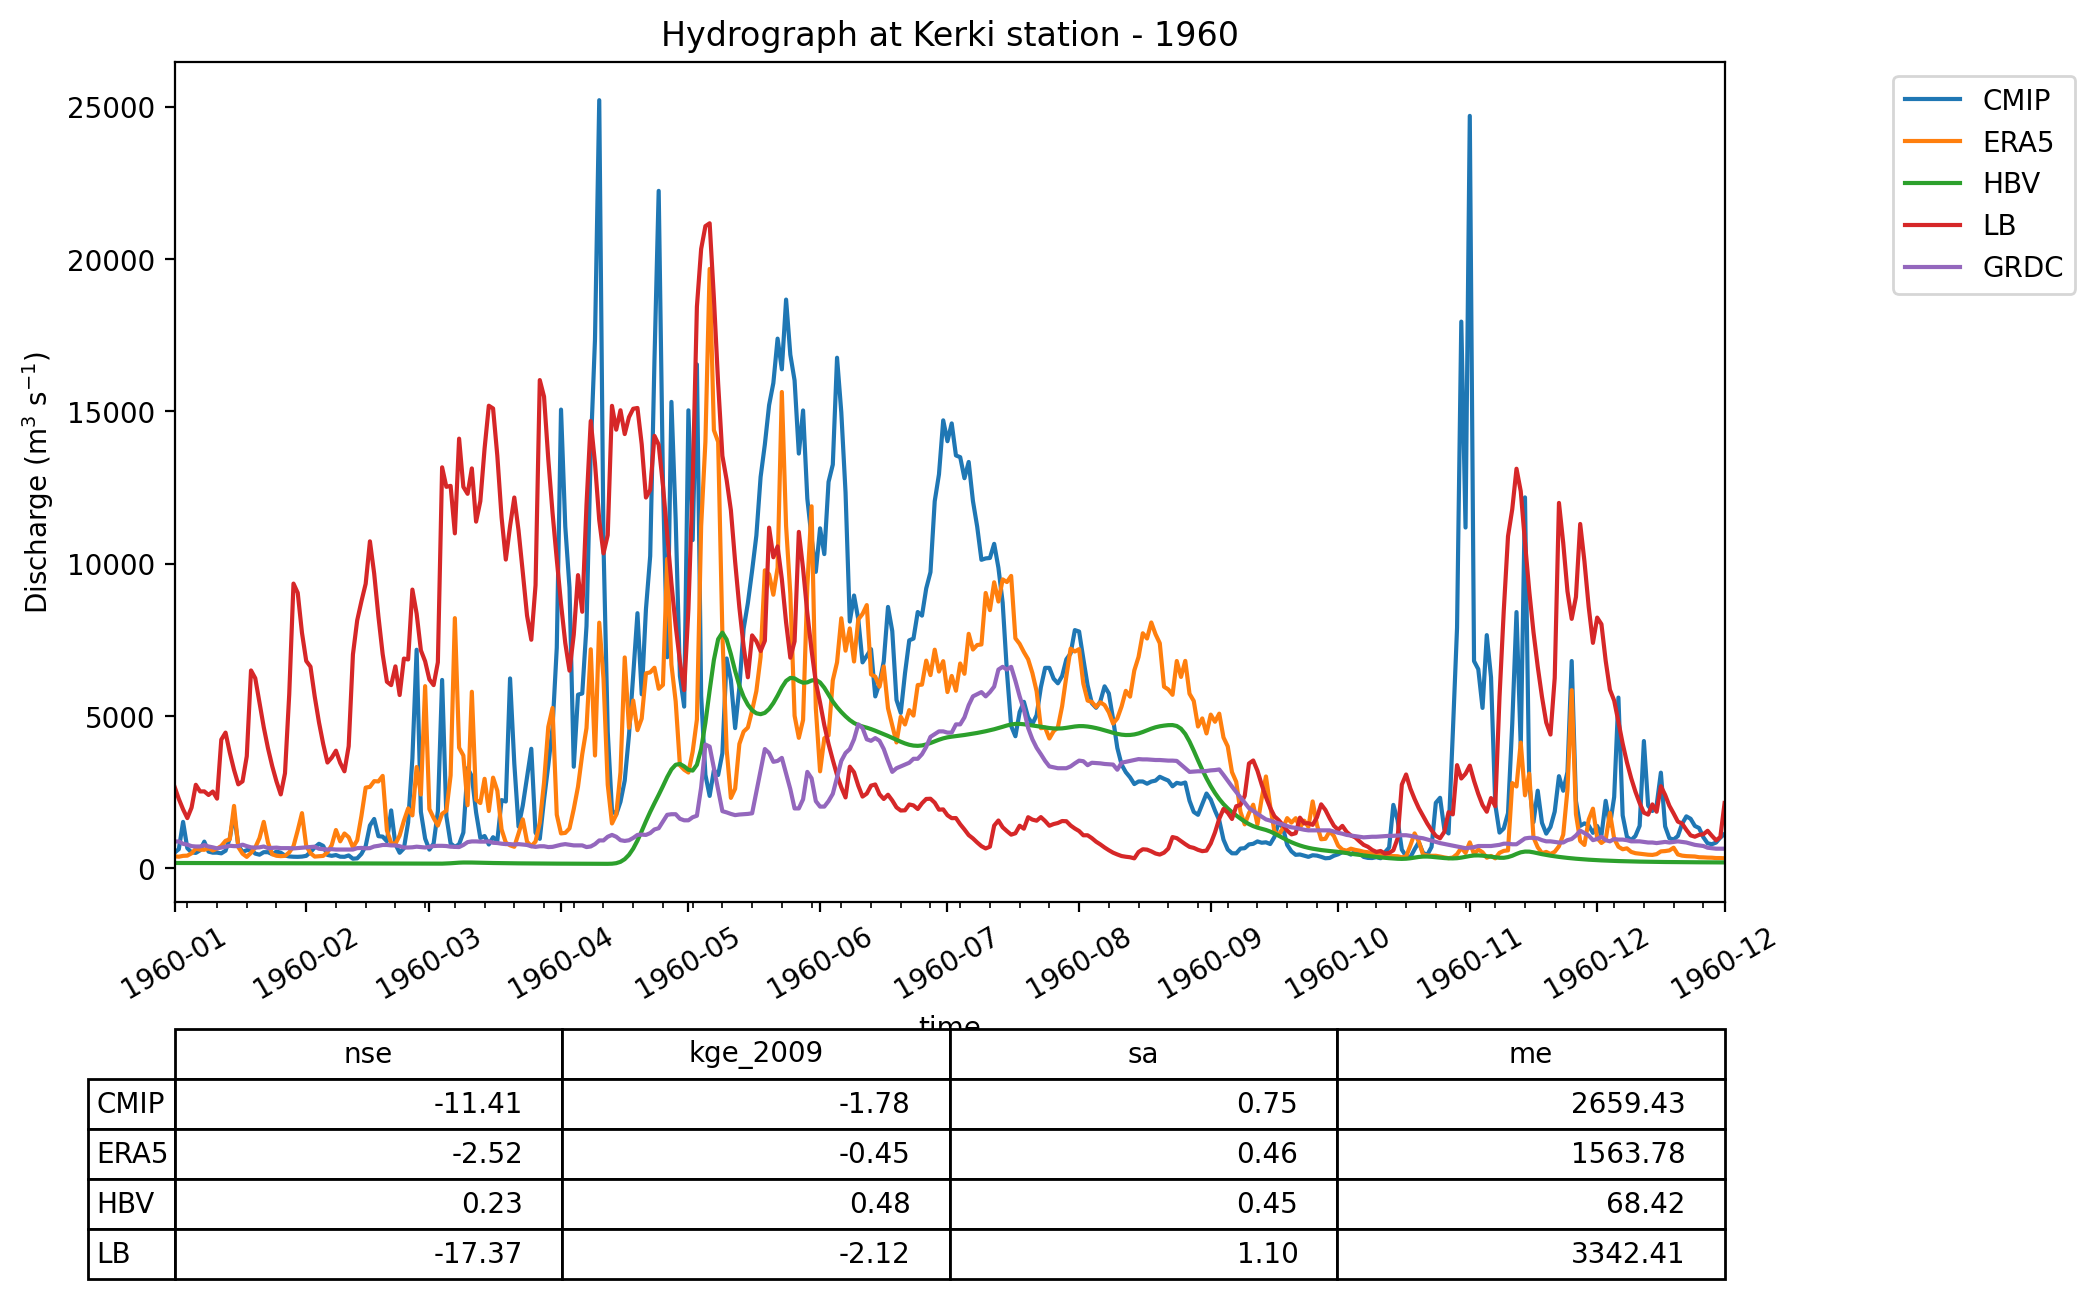

In [193]:
import ewatercycle.analysis


ewatercycle.analysis.hydrograph(
    discharge=df_1960,
    reference="GRDC",
    figsize=(10,8),
    title='Hydrograph at Kerki station - 1960',
    dpi = 200,
    filename="hydrograph_1960.png",
)
